In [40]:
# Manipulation des données
import numpy as np
import pandas as pd
# Visualisation
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Librairie Sklearn de modélisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
# Supprimer les avertissements
import warnings
warnings.filterwarnings('ignore')

In [3]:
# charger le fichier csv
df = pd.read_csv('Churn_Modelling.csv')

# Analyse exploratoire des données

In [4]:
# Afficher les 10 premières lignes
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
# Affichage des info generales sur le dataset et les types des colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Définition des features et du label:
## *Les features/caractéristiques:*
- **RowNumber**: variables quantitative discrète qui représente le numéro de la ligne
- **CustomerId**: variables quantitative discrète qui représente l'identifient unique du client en base de données
- **Surname**: variable qualitative nominale qui indique le nom de famille du client
- **CreditScore** : variables quantitative discrète qui indique le score de crédit du client.
- **Geography**: variable qualitative nominale qui indique la situation géographique du client (par exemple, pays ou région).
- **Gender** : variable qualitative nominale indiquant le sexe du client.
- **Age** : variables quantitative discrète qui indique l'âge du client.
- **Tenure** : variables quantitative discrète qui indique le nombre d'années d'ancienneté du client auprès de la banque.
- **Balance** : variables quantitative continue qui indique le solde du compte du client.
- **NumOfProducts** : variables quantitative discrète qui renseigne le nombre de produits bancaires que le client possède.
- **HasCrCard** : variable qualitative nominale qui indique si le client possède une carte de crédit (non/oui => 0, 1).
- **IsActiveMember** : variable qualitative nominale qui indique si le client est un membre actif (non/oui => 0, 1).
- **EstimatedSalary** :variables quantitative continue qui renseigne le salaire estimé du client.

## Le label:
- **Exited**: variable qualitative nominale qui indique si le client a quitté la banque (non/oui => 0, 1).

In [6]:
# Vérifier les valeurs manquantes
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


# Pré-traitement des données
### Suppression des colonnes qui n'apportent pas d'éléments pertinents:
- RowNumber car elle indique seulement l'emplacement de la ligne
- CustomerId et Surname qui n'apportent pas d'informations importantes dans la prédictions des churn et aussi pour anonymiser les données.

In [7]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [8]:
# Vérification des colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Visualisation des données

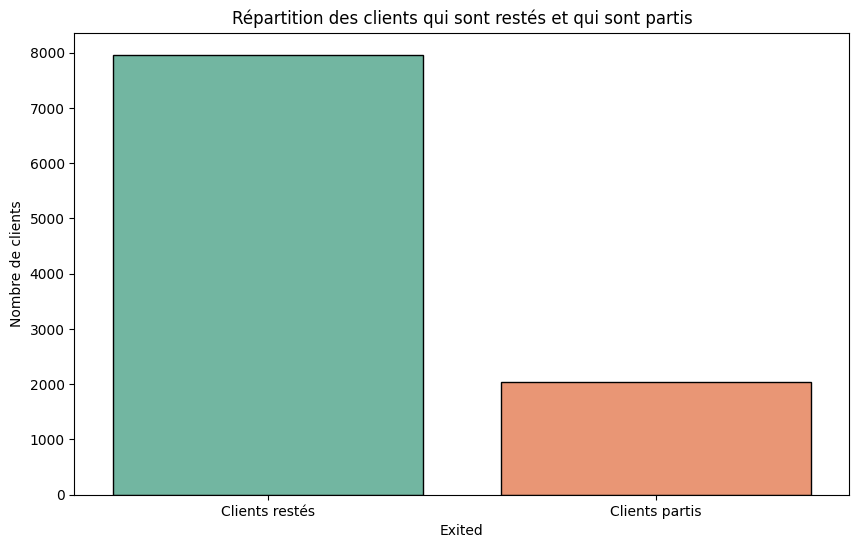

In [9]:
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=df, x='Exited', palette='Set2', edgecolor='black')
# plt.xlabel('Exited')
plt.title('Répartition des clients qui sont restés et qui sont partis')
plt.ylabel('Nombre de clients')
plt.xticks([0, 1], ['Clients restés', 'Clients partis'])
plt.show()

In [10]:
# @title Séparation des features en fonction de leur type
# Variable quantitative
numerical_columns = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'CreditScore']

# Variable qualitative
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']


# Afficher les résultats
print("Colonnes numériques:", numerical_columns)
print("Colonnes catégorielles:", categorical_columns)


Colonnes numériques: ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'CreditScore']
Colonnes catégorielles: ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']


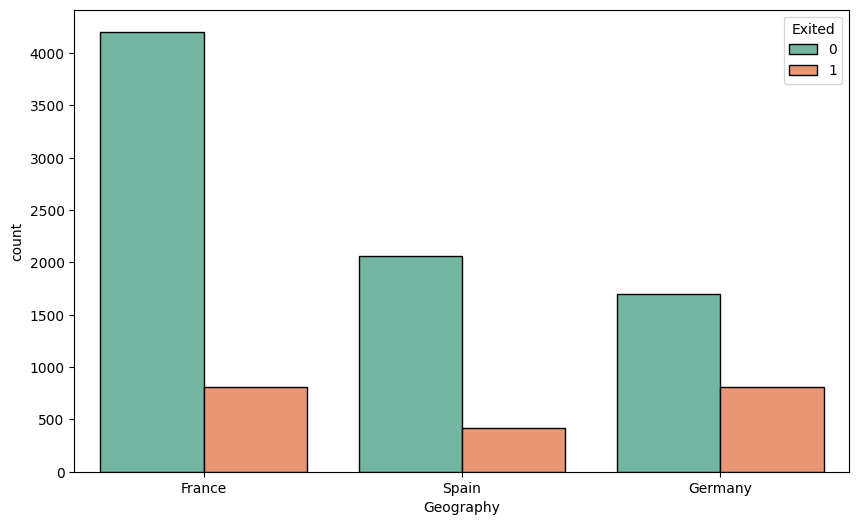

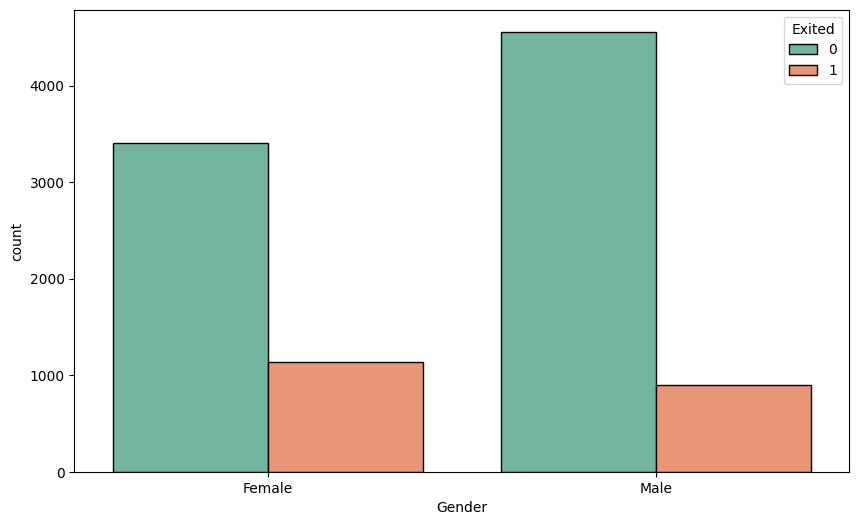

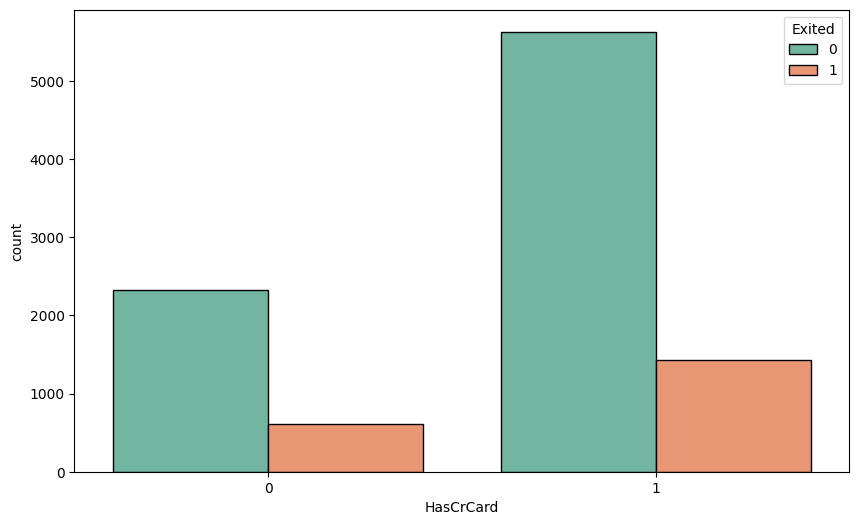

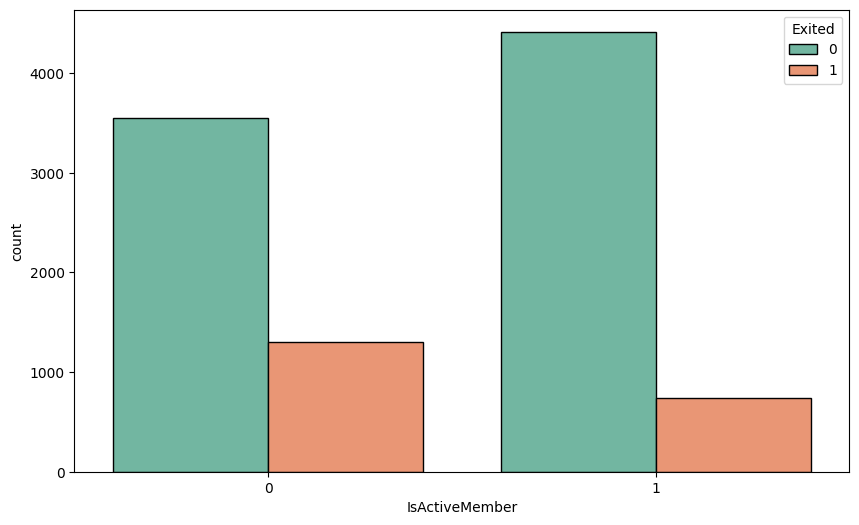

In [11]:
# @title Investigation de toutes les caractéristiques catégorielle en fonction de Exited
for quantitative in categorical_columns:
  plt.figure(figsize=(10, 6), dpi=100)
  ax = sns.countplot(data=df, x=quantitative, hue='Exited', palette='Set2', edgecolor='black')
  print()

La médiane est: 37.0


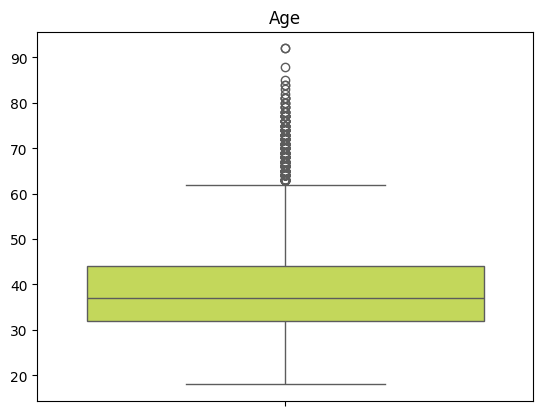

La médiane est: 5.0


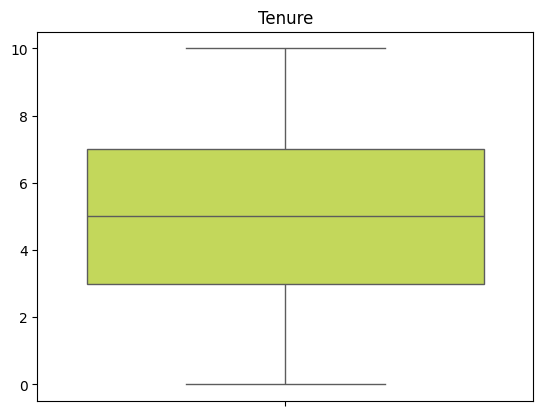

La médiane est: 97198.54000000001


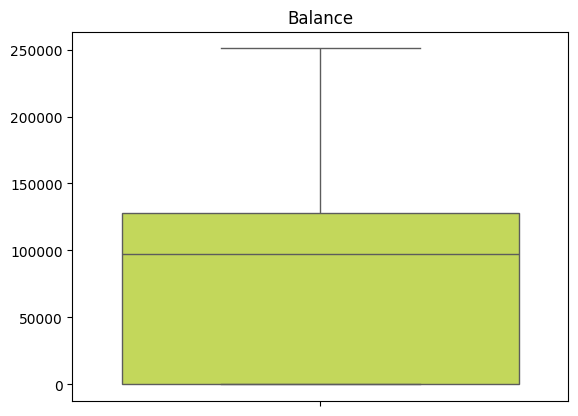

La médiane est: 1.0


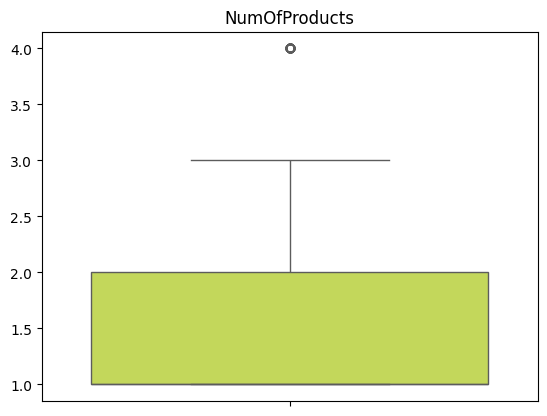

La médiane est: 100193.915


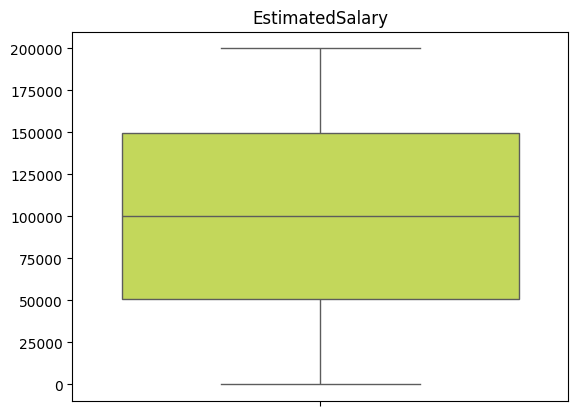

La médiane est: 652.0


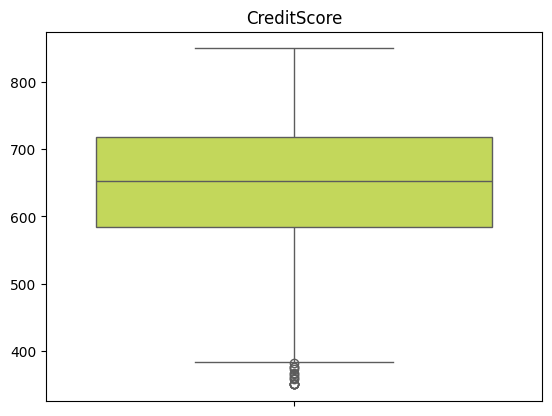

In [12]:
# @title Investigation de toutes les caractéristiques numériques en fonction de Exited
for c in numerical_columns:
   if df[c] is not df['Exited']:
    x = df[c].values
    ax = sns.boxplot(x, color='#D1EC46')
    print(f"La médiane est: {df[c].median()}")
    plt.title(f"{c}")
    plt.show()

In [13]:
# @title Encodage des variables catégorielles
# HasCrCard et isActiveMember sont déjà encodées
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [14]:
# @title Vérification de l'encodage des variables catégorielles
df['Gender'].value_counts()

,count
Gender,
1,5457
0,4543


In [15]:
df['Geography'].value_counts()

,count
Geography,
0,5014
1,2509
2,2477


In [16]:
# Mise à l'échelle des variables quantitatives
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [17]:
# Vérification
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,2,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,0,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,0,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,2,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


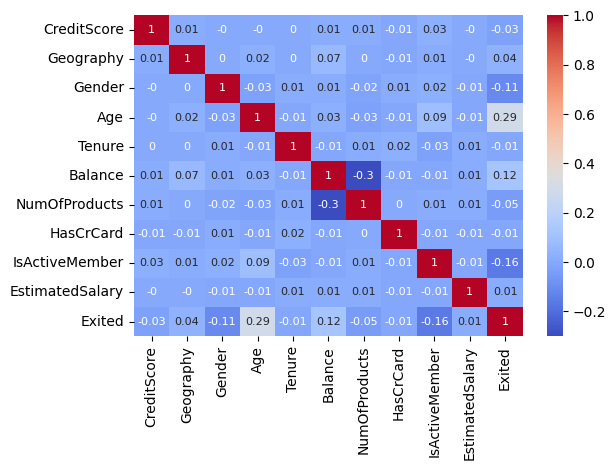

In [18]:
import seaborn as sns
#Visualisation des correlations entre variables
sns.heatmap(data=df.corr().round(2),
cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

In [19]:
# @title Selection de feature-predicteur
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [20]:
# @title Algorithme de régression linéaire
# Séparation en training et test
from sklearn.linear_model import LinearRegression
#predicteurs
X = df[features]
y = df.Exited

In [21]:
#Effectuer la séparation Training-Test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
y , test_size = 0.2, random_state=15)
# detail de chacun des sous-dataset
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8000, 10) (8000,)
(2000, 10) (2000,)


In [22]:
#estimation des coeeficients du modele lineaire
lm = LinearRegression()
lm.fit(X_train,y_train)
#Afficher les coefficients
print(lm.intercept_)
print(lm.coef_)

0.05672920360911804
[-0.04552314  0.0095907  -0.07667112  0.83360704 -0.01391563  0.16324397
 -0.00903078 -0.00615017 -0.14747129  0.02314988]


In [23]:
#Afficher l'equation
list(zip(features, lm.coef_))

[('CreditScore', np.float64(-0.04552313669131299)),
 ('Geography', np.float64(0.009590697554744815)),
 ('Gender', np.float64(-0.0766711225615074)),
 ('Age', np.float64(0.8336070390240148)),
 ('Tenure', np.float64(-0.013915625091876245)),
 ('Balance', np.float64(0.1632439728902344)),
 ('NumOfProducts', np.float64(-0.009030782976142352)),
 ('HasCrCard', np.float64(-0.00615017057363225)),
 ('IsActiveMember', np.float64(-0.14747129168490433)),
 ('EstimatedSalary', np.float64(0.02314987897043131))]

In [24]:
# proceder au test
y_pred = lm.predict(X_test)

In [25]:
import numpy as np
#comparer les valeurs test et prédites
test_pred_df = pd.DataFrame( { 'Valeurs test': y_test,
'Valeurs prédites': np.round( y_pred, 2),
'residuels': y_test - y_pred } )
test_pred_df[0:10]

,Valeurs test,Valeurs prédites,residuels
522,0,0.11,-0.110649
5667,0,0.04,-0.041767
4030,0,0.17,-0.171732
3198,0,0.08,-0.078060
2902,0,0.14,-0.136272
3357,0,-0.02,0.016507
4356,0,0.39,-0.388455
3105,1,-0.01,1.005965
14,0,0.08,-0.082727
4304,0,0.27,-0.265222


In [ ]:
from sklearn import metrics
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,
y_pred)))
#Calcul du R-squared
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.3733340403241146
0.13534885689019838


In [26]:
features = ['Age','Balance', 'IsActiveMember']
#predicteurs
X = df[features]
y = df.Exited
#Effectuer la séparation Training-Test

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,
test_size = 0.2, random_state=15)
#detail de chacun des sous-dataset
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#estimation des coeeficients du modele lineaire
lm = LinearRegression()
lm.fit(X_train,y_train)
#Afficher les coefficients
print(lm.intercept_)
print(lm.coef_)
#Afficher l'equation
list(zip(features, lm.coef_))
# proceder au test
y_pred = lm.predict(X_test)
#comparer les valeurs test et prédites
test_pred_df = pd.DataFrame( { 'Valeurs test': y_test,
'Valeurs prédites': np.round( y_pred, 2),
'residuels': np.round(y_test - y_pred, 2) } )
print(test_pred_df[0:10])

(8000, 3) (8000,)
(2000, 3) (2000,)
-0.008823020492975508
[ 0.84298237  0.16534694 -0.14905891]
      Valeurs test  Valeurs prédites  residuels
522              0              0.12      -0.12
5667             0              0.02      -0.02
4030             0              0.12      -0.12
3198             0              0.11      -0.11
2902             0              0.10      -0.10
3357             0              0.02      -0.02
4356             0              0.35      -0.35
3105             1             -0.04       1.04
14               0              0.04      -0.04
4304             0              0.29      -0.29


In [27]:
# @title Algorithme de classification KNN
# Créer l'objet Neighbours Classifier
# On considère KNN avec pondération uniforme
weight = 'uniform'
k_neighbors = 15
clf = neighbors.KNeighborsClassifier(k_neighbors, weights=weight)

In [28]:
from re import X
# @title Selection de feature-predicteur
# On prend en compte les prédicteurs suivants:
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = df[features]
# On considère aussi la classe à prédire/determiner
y = df.Exited
# print(df)

In [29]:
#Effectuer la séparation Training-Test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
y , test_size = 0.2, random_state=15)
# detail de chacun des sous-dataset
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8000, 10) (8000,)
(2000, 10) (2000,)


In [30]:
# @title On procède à l'apprentissage du modèle
# Faire apprendre le model en utilisant les trainings set
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
#  On évalue maintenant la performance de l’algorithme utilisé comme suit en utilisant l'echantillon  d'apprentissage, soit X_train

In [31]:
# @title Prédiction avec le modèle obtenu
# Utilisation de l'échantillon d'apprentissage
# Prédire la classe pour toutes les observations dans X_train
Z = clf.predict(X_train)
print(Z.shape)
# Comparaison des classes prédites avec les vrais labels de classe
accuracy=clf.score(X_train, y_train)
print(f"Accuracy du modèle prédit: {round(accuracy,2)} ")

(8000,)
Accuracy du modèle prédit: 0.83 


In [32]:
# On évalue maintenant la performance de l'algorithme utilisé comme suit en utilisant un échantillon out-of-sample
ech = [[3,6,9,5,4,2,7,8,10,1],[5,7,8,1,4,10,3,6,2,9]]
Z = clf.predict(ech)
print(Z.shape)
print(Z)

(2,)
[0 0]


# Regression lineaire

In [33]:
# @title Obtenir le data et Cible
y = df.Exited
X = df.drop(['Exited'], axis=1)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 781.4 KB


In [34]:
# @title Ensemble de valeurs de alpha (lambda) à utiliser avant de determiner une valeur optimale
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [37]:
# Obtentions des modeles selon les valeurs de alpha des coefficient
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
ridge = Ridge()
coefs = []
for a in alphas:
  ridge.set_params(alpha=a)
  ridge.fit(X, y)
  coefs.append(ridge.coef_)
np.shape(coefs)

(100, 10)

Text(0.5, 1.0, 'Variation des weights selon alpha')

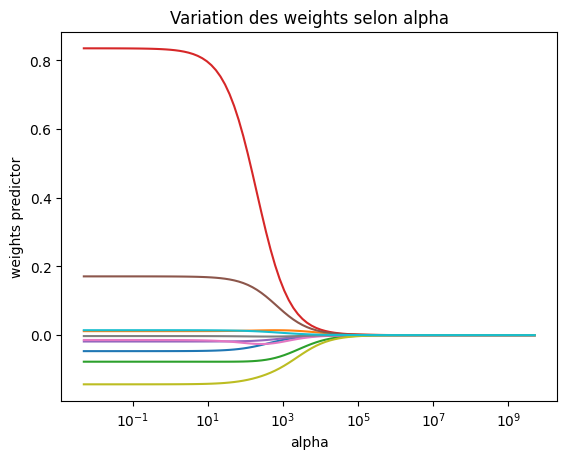

In [38]:
# @title Variation des weights selon alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights predictor')
plt.title('Variation des weights selon alpha')

In [39]:
# @title Split du data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=44)

In [41]:
# @title Test avec alpha = 4
ridge2 = Ridge(alpha=4)
# Fit a ridge regression on the training data
ridge2.fit(X_train, y_train)
# Use this model to predict the test data
pred2 = ridge2.predict(X_test)
# Print coefficients
print(pd.Series(ridge2.coef_, index=X.columns))
# Calculate the test MSE
print(mean_squared_error(y_test, pred2))

CreditScore       -0.054511
Geography          0.011003
Gender            -0.080509
Age                0.800695
Tenure            -0.011352
Balance            0.164444
NumOfProducts     -0.023523
HasCrCard         -0.010631
IsActiveMember    -0.140673
EstimatedSalary    0.012525
dtype: float64
0.13717669497150684


In [42]:
# @title Test avec alpha = 10**10
ridge3 = Ridge(alpha=10**10 )
# Fit a ridge regression on the training data
ridge3.fit(X_train, y_train)
# Use this model to predict the test data
pred3 = ridge3.predict(X_test)
# Print coefficients
print(pd.Series(ridge3.coef_, index=X.columns))
# Calculate the test MSE
print(mean_squared_error(y_test, pred3))

CreditScore       -2.061622e-09
Geography          9.437595e-09
Gender            -1.713045e-08
Age                1.290918e-08
Tenure            -8.208850e-10
Balance            9.416572e-09
NumOfProducts     -3.117825e-09
HasCrCard         -2.364650e-09
IsActiveMember    -2.458972e-08
EstimatedSalary    1.258410e-09
dtype: float64
0.1609053091844307


In [44]:
# @title Valeur ideale de lambda
ridgecv = RidgeCV(alphas=alphas, scoring='r2')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

np.float64(1.004616501282523)

In [46]:
# @title Valeur des coefficients avec valeur ideale de alpha
ridge4 = Ridge(alpha=ridgecv.alpha_)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index=X.columns)

,0
CreditScore,-0.046562
Geography,0.011599
Gender,-0.077423
Age,0.831188
Tenure,-0.018635
Balance,0.170847
NumOfProducts,-0.014334
HasCrCard,-0.002819
IsActiveMember,-0.143166
EstimatedSalary,0.014296


Text(0, 0.5, 'weights')

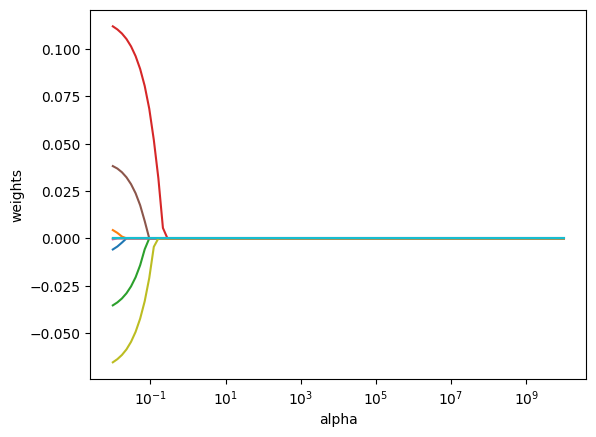

In [48]:
# @title Lasso
from sklearn.preprocessing import scale
lasso = Lasso(max_iter=10000)
coefs = []
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(scale(X_train), y_train)
  coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [49]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.13711618161858258

In [50]:
#The coefficients
pd.Series(lasso.coef_, index=X.columns)

,0
CreditScore,-0.051849
Geography,0.010792
Gender,-0.080103
Age,0.814577
Tenure,-0.009963
Balance,0.164367
NumOfProducts,-0.020305
HasCrCard,-0.010070
IsActiveMember,-0.140833
EstimatedSalary,0.011084
